In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
questions = pd.read_csv('Questions.csv')
answers = pd.read_csv('Answers.csv')

In [3]:
questions.columns.values

array(['Id', 'PostTypeId', 'AcceptedAnswerId', 'CreationDate', 'Score',
       'ViewCount', 'Body', 'OwnerUserId', 'OwnerDisplayName',
       'LastEditorUserId', 'LastEditDate', 'LastActivityDate', 'Title',
       'Tags', 'AnswerCount', 'CommentCount', 'FavoriteCount', 'ClosedDate'], dtype=object)

In [4]:
answers.columns.values

array(['Id', 'PostTypeId', 'ParentId', 'CreationDate', 'Score', 'Body',
       'OwnerUserId', 'OwnerDisplayName', 'LastEditorUserId',
       'LastEditorDisplayName', 'LastEditDate', 'LastActivityDate',
       'CommentCount'], dtype=object)

### Combine questions and their *accepted* answers into one DataFrame

The questions table has an AcceptedAnswerId column, and the answers table has an Id column.

In [5]:
QA = questions.merge(answers,
                     left_on = 'AcceptedAnswerId',
                     right_on = 'Id',
                     suffixes = ['_questions','_answers'])

### How many questions don't have a valid accepted answer?

In [7]:
#solution 1
len(questions) - len(questions[questions['AcceptedAnswerId'].notnull()])
#solution 2
len(questions) - len(QA)
#solution 3
len(questions[questions['AcceptedAnswerId'].isnull()])

296

### How many times did a question asker answer his/her own question? (!)

In [12]:
QA.columns.values

array(['Id_q', 'PostTypeId_q', 'AcceptedAnswerId', 'CreationDate_q',
       'Score_q', 'ViewCount', 'Body_q', 'OwnerUserId_q',
       'OwnerDisplayName_q', 'LastEditorUserId_q', 'LastEditDate_q',
       'LastActivityDate_q', 'Title', 'Tags', 'AnswerCount',
       'CommentCount_q', 'FavoriteCount', 'ClosedDate', 'Id_a',
       'PostTypeId_a', 'ParentId', 'CreationDate_a', 'Score_a', 'Body_a',
       'OwnerUserId_a', 'OwnerDisplayName_a', 'LastEditorUserId_a',
       'LastEditorDisplayName', 'LastEditDate_a', 'LastActivityDate_a',
       'CommentCount_a'], dtype=object)

In [7]:
len(QA[QA['OwnerUserId_questions'] == QA['OwnerUserId_answers']])

31

### Among questions, does increasing ViewCount and increasing AnswerCount correlate with higher Score?

* Split ViewCount into 4 equal-sized groups named "Low", "Medium", "High", and "Very high"
* Create a new column in questions called ViewCountQuartile containing the ViewCount group for each question
    * For example, the first question has ViewCount 74 and ViewCountQuartile "Medium"
* Split the questions by ViewCountQuartile and AnswerCount, and compute the average Score of questions that fall into each (ViewCountQuartile, AnswerCount) bucket.
    * For example, questions that have ViewCountQuartile="View High" and AnswerCount=7.0 have an average Score of 10.0
* Visually check if increasing ViewCount and increasing AnswerCount are related to higher average Scores.

In [27]:
group = pd.qcut(questions['ViewCount'],4,labels=["Low", "Medium", "High", "Very high"])
questions['ViewCountQuartile'] = group
pv = pd.pivot_table(questions,
                   index='ViewCountQuartile',
                   columns='AnswerCount',
                   values='Score',
                   aggfunc=mean)
pv

AnswerCount,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
ViewCountQuartile,,,,,,,,
Low,NaN,1.006536,1.255319,0.500000,NaN,NaN,NaN,NaN
Medium,0.0,1.298701,1.383333,1.533333,1.500000,NaN,NaN,NaN
High,NaN,1.482270,1.205882,1.571429,1.000000,1.5,NaN,NaN
Very high,NaN,2.366412,2.805556,4.400000,4.818182,3.0,4.0,10.0


In [22]:
# Split ViewCount into 4 equal-sized groups named "Low", "Medium", "High", and "Very high"
#solution 1
ViewCount_rank = questions['ViewCount'].rank(ascending=True) #从低到高
ViewCount_group = pd.qcut(ViewCount_rank,
                         4,
                         labels=["Low", "Medium", "High", "Very high"])
#solution 2
ViewCount_group = pd.qcut(questions['ViewCount'],
                         4,
                         labels=["Low", "Medium", "High", "Very high"])
#ViewCount_rank[:5]
#ViewCount_group[:5]

In [23]:
#Create a new column in questions called ViewCountQuartile containing the ViewCount group for each question
questions['ViewCountQuartile'] = ViewCount_group
#Get the top 10 rows
#questions[['ViewCount','ViewCountQuartile']][:10]

In [24]:
#Split the questions by ViewCountQuartile and AnswerCount, 
#and compute the average Score of questions that fall into each (ViewCountQuartile, AnswerCount) bucket.
pd.pivot_table(questions,
               index='ViewCountQuartile',
               columns='AnswerCount',
               values='Score',
               aggfunc=mean)

AnswerCount,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
ViewCountQuartile,,,,,,,,
Low,NaN,1.006536,1.255319,0.500000,NaN,NaN,NaN,NaN
Medium,0.0,1.298701,1.383333,1.533333,1.500000,NaN,NaN,NaN
High,NaN,1.482270,1.205882,1.571429,1.000000,1.5,NaN,NaN
Very high,NaN,2.366412,2.805556,4.400000,4.818182,3.0,4.0,10.0


### Generate a plot like the one below

![Num words in question title](NumWords.png)

(Note: Consider *all* questions, not just the ones with a valid AcceptedAnswerId.)

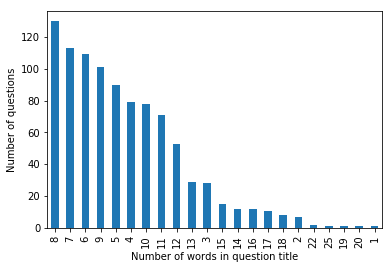

In [50]:
def func(x):
    return len(x.split(' '))
questions['Title'].map(func).value_counts().plot(kind='bar')
ylabel('Number of questions')
xlabel('Number of words in question title')